In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 학습 데이터 읽기 및 전처리 과정
savings2.txt는 한줄에 한사람의 정보가 있으며 (나이,월급,월 소비 금액,가입한상품) 의 형태이다.<br/>
나이는 20세부터 79세까지<br/>
월급<br/>
가입한 상품은 1부터 5까지 총 5개이다.<br/>

In [2]:
Person=[]
Category=[]
cnt = 0;
f = open("./savings2.txt",'r')
while True:
    line = f.readline()
    if not line: break
    Person.append([])
    Person[cnt].append(int(line.strip().split(',')[0])) # age
    Person[cnt].append(int(line.strip().split(',')[1])*(1.5)) # salary
    Person[cnt].append(int(line.strip().split(',')[2])) # spend
    Category.append([int(line.strip().split(',')[3])]) # product
    cnt+=1
f.close()

### 분류할 대상의 정보 입력

In [3]:
# 분류대상
age = int(input('나이 입력(10~100):'))
salary =  int(input('월급 입력( 0~1000 ):'))
spend = int(input('월 소비 금액 입력( 0~1000 ):'))
target = [age, salary,spend]

나이 입력(10~100):20
월급 입력( 0~1000 ):400
월 소비 금액 입력( 0~1000 ):200


### 분석을 위해 Dataset 변경
분류집단을 행렬형태로 만들고 분류 대상과 분류 범주 생성

In [4]:
def data_set():
    dataset = np.array(Person)
    class_target = np.tile(target, (len(dataset), 1))   # 분류대상
    class_category = np.array(Category)         # 분류범주

    return dataset, class_target, class_category

# dataset 생성
dataset, class_target, class_categoty = data_set()   # data_set()함수 호출

### 거리측정
유클리드 거리를 이용하여 분류 대상과 분류 범주와의 거리를 구함
가까운 거리에 있는 순으로 오름차순 정렬 후 분류

In [5]:
def classify(dataset, class_target, class_categoty, k):
    # 유클리드 거리 계산
    diffMat = class_target - dataset   # 두 점의 차
    sqDiffMat = diffMat**2             # 차에 대한 제곱
    row_sum = sqDiffMat.sum(axis=1)    # 차에 대한 제곱에 대한 합
    distance = np.sqrt(row_sum)        # 차에 대한 제곱에 대한 합의 제곱근(최종거리)

    # 가까운 거리 오름차순 정렬
    sortDist = distance.argsort()

    # 이웃한 k개 선정
    class_result = {}
    for i in range(k):
        c = class_categoty[sortDist[i]]
        class_result[c[0]] = class_result.get(c[0], 0) + 1

    return class_result

### 함수호출
분류 대상이 어떤 카테고리에 더 많이 가까운지 확인

In [6]:
# 함수 호출
k = 10;
class_result = classify(dataset, class_target, class_categoty, k)  # classify()함수호출

## 결과출력

In [9]:

# 분류결과 출력 함수 정의
def classify_result(class_result):   
    product=np.array([0,0,0,0,0])
    for c in class_result.keys():
        product[c]=class_result[c]*(-1);
    sortProduct = product.argsort()
    #cnt=product[sortProduct[0]]
    #productNum=sortProduct[0]
    return product, sortProduct


product,sortProduct = classify_result(class_result)
for i in range(0,5):
    if(product[sortProduct[i]]*(-1) == 0): break
    print('분류 대상과 비슷한 정보를 가진 {}명의 사람이 상품 {}번을 사용합니다'.format(product[sortProduct[i]]*(-1),sortProduct[i]))


분류 대상과 비슷한 정보를 가진 8명의 사람이 상품 2번을 사용합니다
분류 대상과 비슷한 정보를 가진 2명의 사람이 상품 4번을 사용합니다


## 데이터 분포 시각화
#### 1번 상품 사용자 분포

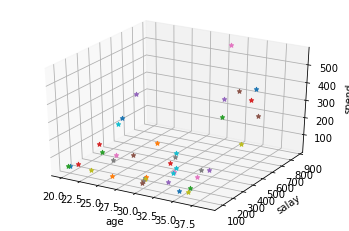

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==1:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*');
        
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()

#### 2번 상품 사용자 분포

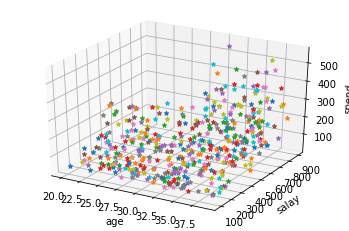

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==2:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*');
        
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()

#### 3번 상품 사용자 분포

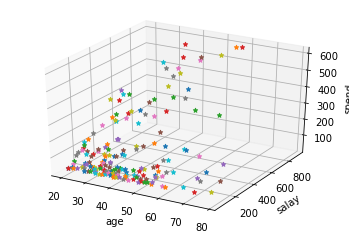

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==3:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*');
        
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()

#### 4번 상품 사용자 분포

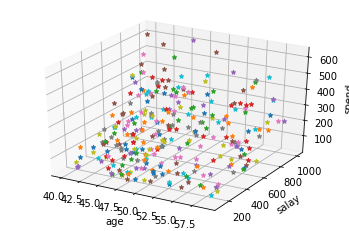

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==4:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*');
        
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()

#### 5번 상품 사용자 분포

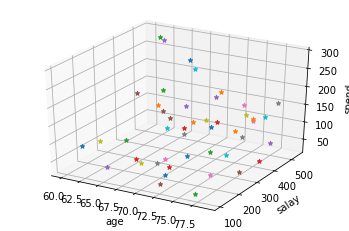

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==5:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*');
        
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()

#### 전체 사용자 및 분류대상 분포

1~5번 상품 가입자들과 분류대상(빨간색 동그라미) 표시

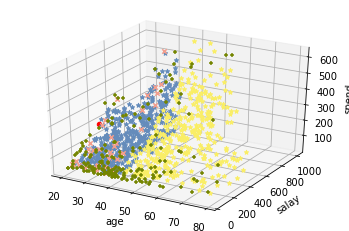

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(0,len(Person)):
    if Category[i][0]==1:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='x',color='#f29e8e');
    if Category[i][0]==2:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*',color='#658cbb');
    if Category[i][0]==3:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='+',color='#748500');
    if Category[i][0]==4:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*',color='#faee66');
    if Category[i][0]==5:
        ax.scatter(Person[i][0],Person[i][1],Person[i][2],marker='*',color='#faee66');
    
ax.scatter(age,salary,spend,marker='o',color='red')
ax.set_xlabel('age')
ax.set_ylabel('salay')
ax.set_zlabel('spend')
plt.show()